In [2]:
!pip install soundfile simpleaudio 
!pip install librosa scipy

     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     -

  error: subprocess-exited-with-error
  
  × Building wheel for simpleaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [31 lines of output]
      C:\Users\vinee\AppData\Local\Temp\pip-build-env-iqukk8ou\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\vinee\AppData\Local\Temp\pip-build-env-iqukk8ou\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: MIT License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ***********************************************


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Sample Rate: 22050 Hz
Number of Samples: 212893
Total Duration: 9.66 seconds


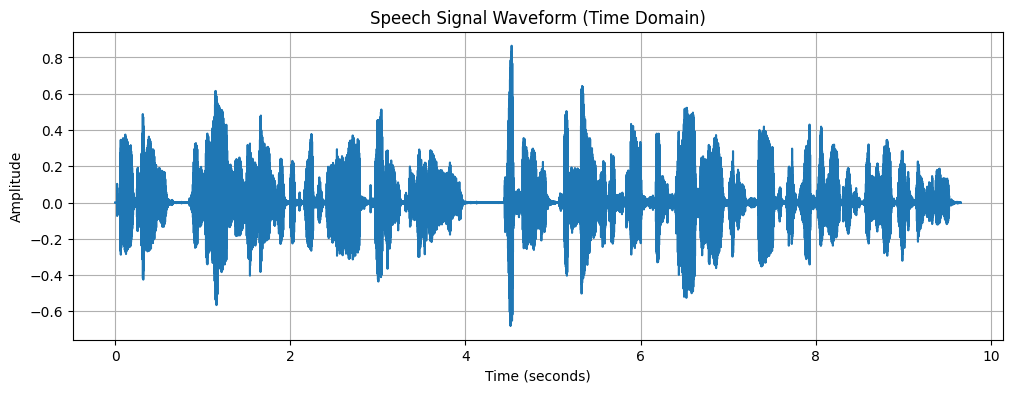

Active Speech Duration: 5.99 seconds


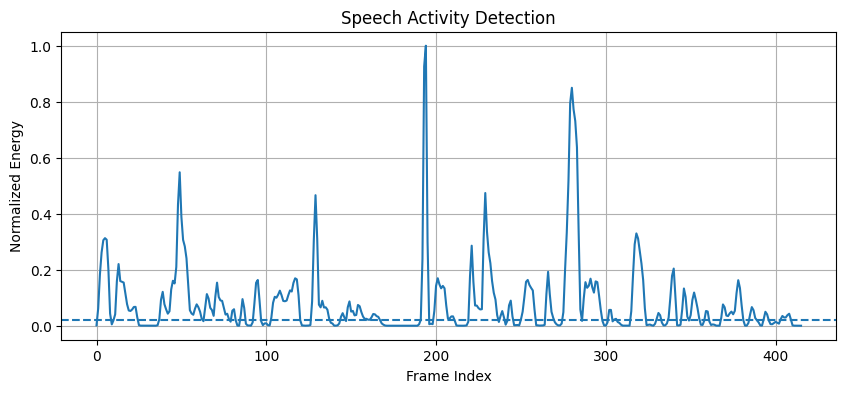

In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_path = r"C:\Users\vinee\Downloads\Speech processing\LJ001-0001.wav"

signal, sample_rate = librosa.load(audio_path, sr=None)

num_samples = len(signal)
duration = num_samples / sample_rate

print("Sample Rate:", sample_rate, "Hz")
print("Number of Samples:", num_samples)
print("Total Duration:", round(duration, 2), "seconds")

time = np.linspace(0, duration, num_samples)

plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Waveform (Time Domain)")
plt.grid()
plt.show()

frame_length = 1024
hop_length = 512

energy = np.array([
    np.sum(signal[i:i+frame_length]**2)
    for i in range(0, len(signal), hop_length)
])

energy = energy / np.max(energy)
threshold = 0.02

active_frames = energy > threshold
active_duration = np.sum(active_frames) * hop_length / sample_rate

print("Active Speech Duration:", round(active_duration, 2), "seconds")

plt.figure(figsize=(10, 4))
plt.plot(energy)
plt.axhline(y=threshold, linestyle='--')
plt.xlabel("Frame Index")
plt.ylabel("Normalized Energy")
plt.title("Speech Activity Detection")
plt.grid()
plt.show()


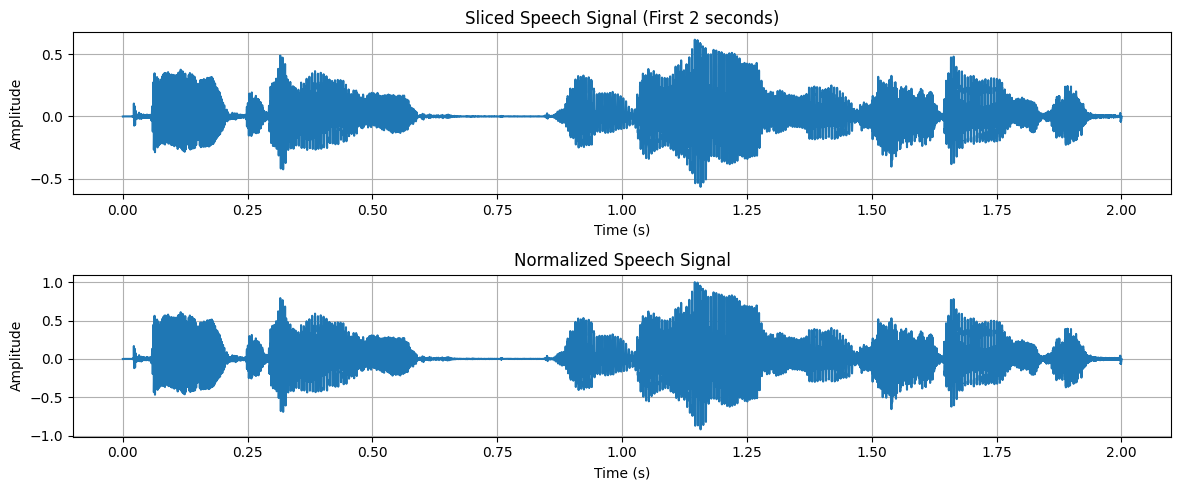

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_path = r"C:\Users\vinee\Downloads\Speech processing\LJ001-0001.wav"

signal, sr = librosa.load(audio_path, sr=None)

slice_duration = 2
slice_samples = int(slice_duration * sr)

sliced_signal = signal[:slice_samples]
slice_time = np.linspace(0, slice_duration, len(sliced_signal))

normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(slice_time, sliced_signal)
plt.title("Sliced Speech Signal (First 2 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(slice_time, normalized_signal)
plt.title("Normalized Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


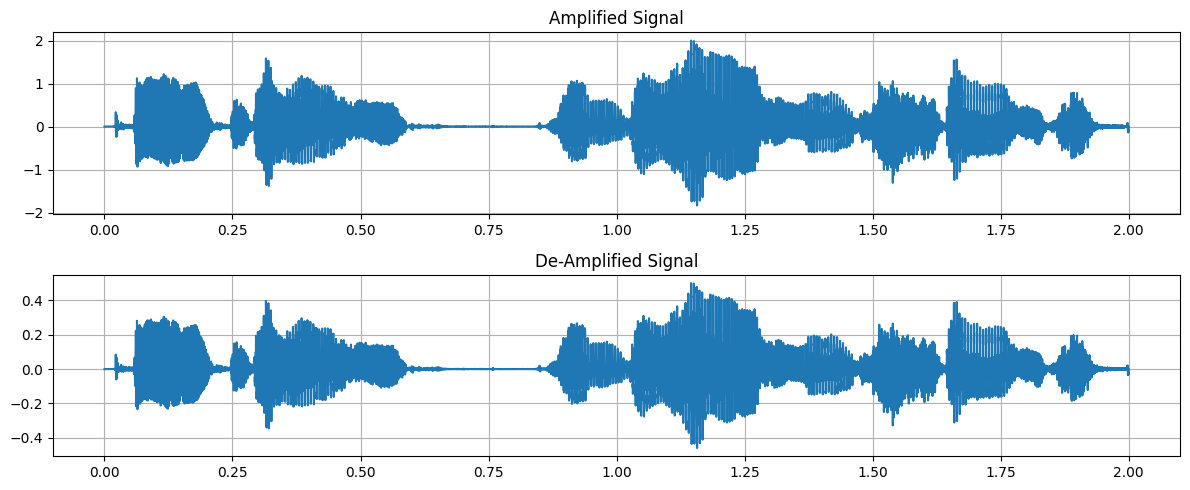

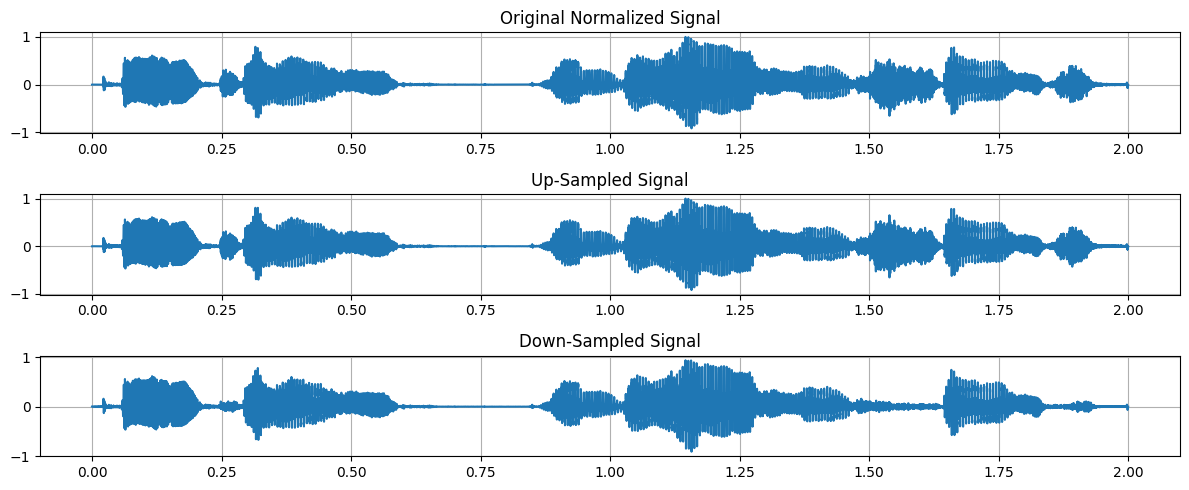

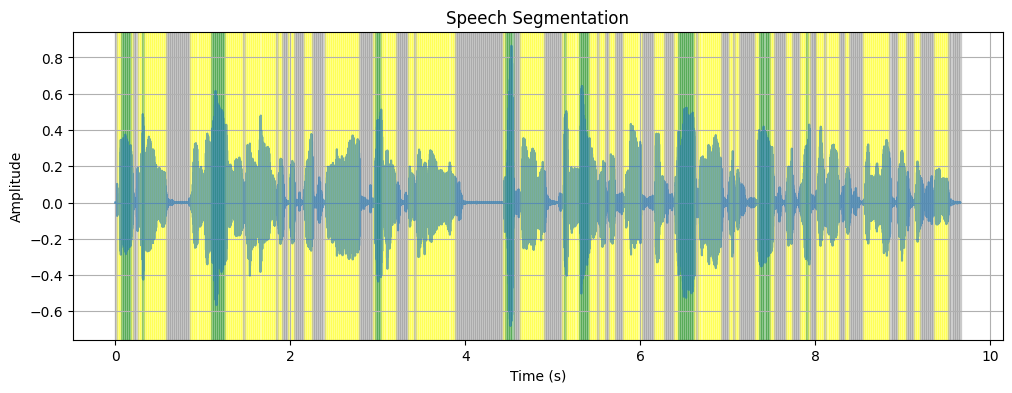

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

audio_path = r"C:\Users\vinee\Downloads\Speech processing\LJ001-0001.wav"

signal, sr = librosa.load(audio_path, sr=None)

slice_duration = 2
slice_samples = int(slice_duration * sr)

sliced_signal = signal[:slice_samples]
slice_time = np.linspace(0, slice_duration, len(sliced_signal))

normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

amplified = 2 * normalized_signal
deamplified = 0.5 * normalized_signal

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(slice_time, amplified)
plt.title("Amplified Signal")
plt.grid()

plt.subplot(2,1,2)
plt.plot(slice_time, deamplified)
plt.title("De-Amplified Signal")
plt.grid()

plt.tight_layout()
plt.show()

upsampled = resample(normalized_signal, len(normalized_signal)*2)
up_time = np.linspace(0, slice_duration, len(upsampled))

downsampled = resample(normalized_signal, len(normalized_signal)//2)
down_time = np.linspace(0, slice_duration, len(downsampled))

plt.figure(figsize=(12,5))
plt.subplot(3,1,1)
plt.plot(slice_time, normalized_signal)
plt.title("Original Normalized Signal")
plt.grid()

plt.subplot(3,1,2)
plt.plot(up_time, upsampled)
plt.title("Up-Sampled Signal")
plt.grid()

plt.subplot(3,1,3)
plt.plot(down_time, downsampled)
plt.title("Down-Sampled Signal")
plt.grid()

plt.tight_layout()
plt.show()

frame_length = 1024
hop_length = 512

energy = np.array([
    np.sum(signal[i:i+frame_length]**2)
    for i in range(0, len(signal), hop_length)
])

energy = energy / np.max(energy)
time_frames = np.arange(len(energy)) * hop_length / sr

silence_thresh = 0.02
voiced_thresh = 0.2

labels = []
for e in energy:
    if e < silence_thresh:
        labels.append(0)
    elif e < voiced_thresh:
        labels.append(1)
    else:
        labels.append(2)

labels = np.array(labels)

time = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,4))
plt.plot(time, signal, alpha=0.6)

for i in range(len(labels)):
    if labels[i] == 0:
        plt.axvspan(time_frames[i], time_frames[i] + hop_length/sr, color='gray', alpha=0.3)
    elif labels[i] == 1:
        plt.axvspan(time_frames[i], time_frames[i] + hop_length/sr, color='yellow', alpha=0.3)
    else:
        plt.axvspan(time_frames[i], time_frames[i] + hop_length/sr, color='green', alpha=0.3)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Speech Segmentation")
plt.grid()
plt.show()
